<a href="https://colab.research.google.com/github/AayushiChoudhary01/cifar10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, datasets
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print(X_train.shape)

(50000, 32, 32, 3)


In [ ]:
y_train[:5]
y_train=y_train.reshape(-1)
print(y_train[:5])

[6 9 9 4 1]


In [ ]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']
classes[y_train[0]]

'frog'

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

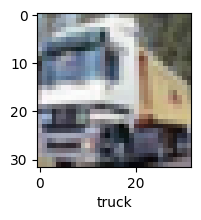

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train[:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:

cnn = models.Sequential([

    Conv2D(filters=32, padding = 'same', activation='relu', kernel_size=(3,3), input_shape = [32,32,3]),
    Conv2D(filters=64, padding = 'same', activation='relu', kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=128, padding = 'same', activation='relu', kernel_size=(3,3)),
    Conv2D(filters=256, padding = 'same', activation='relu', kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(units= 1024,activation = 'relu'),
    Dropout(0.5),
    Dense(units = 10, activation = 'softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

In [ ]:
cnn.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 35s 15ms/step - loss: 1.3911 - accuracy: 0.4947 - val_loss: 1.0497 - val_accuracy: 0.6318
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9765 - accuracy: 0.6547 - val_loss: 0.8688 - val_accuracy: 0.6955
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8195 - accuracy: 0.7130 - val_loss: 0.8138 - val_accuracy: 0.7145
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7205 - accuracy: 0.7476 - val_loss: 0.7309 - val_accuracy: 0.7509
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6468 - accuracy: 0.7728 - val_loss: 0.6791 - val_accuracy: 0.7615
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5907 - accuracy: 0.7925 - val_loss: 0.6785 - val_accuracy: 0.7674
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5402 - accuracy: 0.8108 - val_loss: 0.6477 -

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6672 - accuracy: 0.7813


[0.6672131419181824, 0.7813000082969666]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[3.6613787e-05, 8.1772405e-06, 1.2691637e-05, ..., 3.1919276e-07,
        5.3549606e-06, 1.7341257e-05],
       [2.4813635e-05, 7.5379592e-01, 1.8203145e-12, ..., 7.2347877e-17,
        2.4605796e-01, 1.2135919e-04],
       [9.1681913e-02, 1.6701916e-02, 1.5305683e-04, ..., 4.9276109e-06,
        8.8294065e-01, 8.2430877e-03],
       ...,
       [5.7678889e-08, 3.2412886e-10, 4.6344305e-04, ..., 2.7828908e-04,
        6.5952442e-08, 1.1716812e-08],
       [1.0134657e-03, 9.7749037e-01, 3.9735078e-04, ..., 6.7503155e-05,
        2.0634327e-06, 2.0524922e-03],
       [1.9601779e-13, 1.9495653e-14, 1.5380824e-10, ..., 9.9999952e-01,
        6.0977428e-14, 5.3958482e-16]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [ ]:
y_test[:5]
y_test = y_test.reshape(-1)

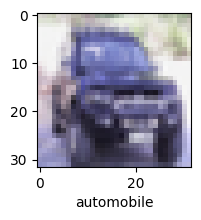

In [ ]:
plot_sample(X_test, y_test, 9)

In [ ]:
classes[9]

'truck'